# Manual equation numbering

## Introduction

A couple of month ago I discovered Python and Jupyter Notebooks and quickly became addicted. When I started writing my very first notebook I saw there´s not yet a built-in equation numbering system. I noticed it is planned to integrate this in [future](http://jupyter-notebook.readthedocs.org/en/latest/examples/Notebook/Typesetting%20Equations.html). For now I developed and use a quick fix to number equations manually, meaning using pure text with no automatic numbering or hyperlink functionality.
The resulting function can be found at the end of this notebook ("The solution"). Since, I documented my way towards this solution in this Workbook I also took the opportunity to say thanks to a number of forum contributors who helped me with this approach. To all others I would also like to express my gratitude for realizing and giving their know-how in forums to such an interesting open source project as Python and the Jupyter Notebook.

Any comments are welcome, but keep in mind I am a newbie on this and these are my first steps :).

Malte Hof malte.hof@iwes.fraunhofer.de

14.7.2015, Kassel/Germany


## The problem

Here is an example of two equations which I wanted to be numbered to refer to them in Markdown cells. My initial idea was to somehow suppress the newline introduced by the display command and then add an equation as text. However, user [minrk](http://stackoverflow.com/questions/17439176/ipython-notebook-how-to-display-multiple-objects-without-newline) taught me display() always introduces a newline. On the other hand his contribution gave me the idea of using HTML.

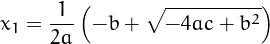

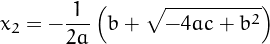

In [15]:
import sympy as sp
from IPython.display import display,HTML 
sp.init_printing(use_unicode=True,use_latex=True,euler=True)
a,b,c,x,x1,x2=sp.symbols("a,b,c,x,x_1,x_2")
eq0 =(a*x**2+b*x+c-0)
eq1=sp.solve(eq0,x)
eq1a=eq1[0]
eq1b=eq1[1]
display(sp.Eq(x1,eq1a))
display(sp.Eq(x2,eq1b))

## Finger exercises towards a solution

Realizing the possibilities of using Python and HTML in the Jupyter Notebook I started to experiment with small code snippets for sub-problems of the problem.

### Printing on same line out of code cell


[Haoyu Chen](http://stackoverflow.com/questions/24592888/align-text-to-the-left-and-right-on-the-same-line-with-css") gave me the deciding hint for doing this:

In [16]:
HTML('<span> Left and                                  </span>'
     '<span style="float:right"> ...right on same line </span>')

### Using format string in HTML expression

[Paul Ivanov-2
](http://python.6.x6.nabble.com/Printing-HTML-within-IPython-Notebook-IPython-specific-prettyprint-td5016624.html) helped me here with his example, which I simplified to my needs:

In [17]:
expr='$a_1+a_23=7 \sqrt(2)$'
HTML("<span>" +'Example Latex expression evaluated by MathJax: ' + str(expr) +"</span>")

### Writing sympy equations as Latex expressions

This is well described on the sympy page. For whatever sympy topic the contributions of [asmeurer]( http://asmeurer.github.io/blog/) gave me always very valuable information.  

In [18]:
str0=sp.latex(eq1a)
str1=sp.latex(eq1b)

### Putting the parts together

In [19]:
expr='$'+str0+'$'
HTML('<span style="font-size:120%">' +'Equation:' + str(expr) +'</span>'
     '<span style="float:right"   > (eq 1)  </span>')

### The solution

The above given approach is now written as a function which solves my initial problem:

In [20]:
def eqNumber(eqText,eq,eqLabel):
   str=sp.latex(eq) #Convert sympy object to Latex
   expr='$'+str+'$' #Add $ signs
   display( HTML('<span style="font-size:120%">' +eqText + (expr) +'</span>'
                 '<span style="float:right"   >' +eqLabel+         '</span>') )
         

eqNumber('Solution 1: ',eq1a,'(1)')
eqNumber('Solution 2: ',eq1b,'(2)')